# Example package dplyr

## Introduction
In this notebook, we will give an example of a calculation of a market power indicator in the hospital sector. These indicators are used in practice by competition agencies in the U.S., the U.K. and the Netherlands. In the lecture we have presented some context and background. In this notebook we will provide a very small dataset to construct the LOCI and the WTP-indicator, using the dplyr-commands that you have seen in the datacamp course.

First, we need the load the package dplyr and the data. We will call the dataset 'mm' (mm as an abbreviation of 'mircro markets'. Second, we have a look at the structure of the data. Zipcodes are the locations of the patients and the hospitals. Hospitals are the hospitals in our dataset and patients represent the number of patients that live in a particular zipcode and go to a particular hospital.

In [4]:
library(dplyr)
mm <- read.csv2("DataMoloch.csv")
str(mm)

'data.frame':	35 obs. of  4 variables:
 $ Zipcode : Factor w/ 7 levels "A","B","C","D",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Hospital: Factor w/ 5 levels "Boone","Giant Health",..: 3 3 3 3 3 3 3 2 2 2 ...
 $ Location: Factor w/ 4 levels "A","C","E","F": 1 1 1 1 1 1 1 2 2 2 ...
 $ Patients: int  1222330 172018 63002 60333 3032 4584 0 101000 23201 506301 ...


If you want to have a look at the dataset:

In [104]:
mm

,Zipcode,Hospital,Location,Patients
1,A,Moloch,A,1222330
2,B,Moloch,A,172018
3,C,Moloch,A,63002
4,D,Moloch,A,60333
5,E,Moloch,A,3032
6,F,Moloch,A,4584
7,G,Moloch,A,0
8,A,Giant Health,C,101000
9,B,Giant Health,C,23201
10,C,Giant Health,C,506301


Now that we have our small dataset, we start to calculate the 'loci'.

## LOCI

Gaynor and Vogt (2011) propose the use of the Logit Competition index (LOCI) to measure market power in the hospital market. The index is based on a weighted average of a hospital’s market share per micro-market. The construction of the competition index starts by modelling the demand with a choice model. The choice models include a utility function which, given characteristics of the consumer and hospital, depends on the utility that a patient derives from each hospital. The utility depends on both observable and non-observable consumer and hospital characteristics. With the logit choice model it is possible to calculate the probability that a specific consumer type will choose a specific hospital. Each group of patients with similar characteristics (e.g. zip-code, age, gender, diagnosis etc.) forms a micro market.

Under a differentiated Bertrand competition model, the competition index (LOCI) of hospital $j$ for consumer type $t$ is given by 
$$    \Lambda_{j}= \displaystyle \sum_t w_{tj}(1-s_{tj}) $$

where the weights $w_{tj}$ are the relative importance of each consumer type
$$    w_{tj}= \frac{N_{t} s_{tj}}{\displaystyle \sum_t N_{t} s_{tj}}$$
and $N_t$ is the number of consumers of the type $t$.

The LOCI $\Lambda_{j}$ is a measure of the competitiveness in the market. The index takes on values between 0 and 1, where  $\Lambda = 0$ means that hospital $j$ is monopolist and $\Lambda = 1$ means that the market is perfectly competitive.

We interpret the LOCI as 1 minus the weighted market share. 

For our purposes, we are able to use  actual market shares with the advantage that all non-observable characteristics are implicitly taken into account. Alternatively, we could have used estimated market shares, with the advantage that all consumers are taken into account. 


### Calculation

We will now start to calculate the LOCI, using the dplyr commands and the 'pipe'. As you remember from the datacamp course, you have to read %>% as 'then'. We will calculate 'w' first. 'w' measures how important a specific zipcode for a hospital is. We will calculate the w as the patients in a zipcode by the total number of patients for that hospital. To calculate the total number of patients per hospital we first have to use the command 'group_by'. Then we add a column with 'w'. Because we want to keep our dataset small, we round the values to the specified number of decimal places (default 0). 

Then we will calculate 's'. 's' is the marketshare of a hospital in a specific zipcode. We will calculate 's' as by dividing the number of patients of a hospital in a specific zipcode, by the total number of patients in that zipcode. To be able to calculate 's', we need to 'group_by' per zipcode. The second group_by overruns the first group_by. Then we can calculate 's'.
Lastly, we will calculate $lambda=w*(1-s)$.

In [105]:
mm <- mm %>%
group_by(Hospital) %>%
mutate(w=round(Patients/sum(Patients), digits=2)) %>%
group_by(Zipcode) %>%
mutate(s=round(Patients/sum(Patients), digits=2)) %>%
mutate(lambda=round(w*(1-s), digits=2)) 
mm


,Zipcode,Hospital,Location,Patients,w,s,lambda
1,A,Moloch,A,1222330,0.8,0.85,0.12
2,B,Moloch,A,172018,0.11,0.86,0.02
3,C,Moloch,A,63002,0.04,0.11,0.04
4,D,Moloch,A,60333,0.04,0.92,0
5,E,Moloch,A,3032,0,0.1,0
6,F,Moloch,A,4584,0,0.12,0
7,G,Moloch,A,0,0,0,0
8,A,Giant Health,C,101000,0.16,0.07,0.15
9,B,Giant Health,C,23201,0.04,0.12,0.04
10,C,Giant Health,C,506301,0.8,0.87,0.1


To calculate the loci we have sum lambda over the hospitals. We add a weighted marketshare $1-loci$ to get a indicator that is rising in market power.

In [106]:
Resultloci <- mm %>%
group_by(Hospital) %>%
summarise(loci=round(sum(lambda),digits=2)) %>%
mutate(weighted_marketshare=round(1-loci, digits=2)) %>%
arrange(desc(weighted_marketshare))

Resultloci

,Hospital,loci,weighted_marketshare
1,Moloch,0.18,0.82
2,Giant Health,0.3,0.7
3,Orbit,0.44,0.56
4,Rose Garden,0.67,0.33
5,Boone,0.94,0.06


## WTP

Both the LOCI and the WTP-indicator are based on a logit demand function.
The WTP indicator differs from the LOCI in the way the supply side is modelled. Where the LOCI-method is based on a differentiated Bertrand model, the WTP is based on a Nash bargaining model.
 
The logic behind the WTP is the following: 
* Health insurance is an "option" on access to hospitals when needed.
* The "willingness to pay" (WTP) for an insurance depends on the network of hospitals
* WTP ($\Delta V_{j, G}$) of consumers gives hospitals bargaining power over insurers
  
In a logit demand system, the expected utility of patient $t$ having access to a network $G$ is given by
$
V_{t, G} = \ln \sum_{g \in G} \exp(U_{tg})
$

The marginal contribution of hospital $j$ to an insurer's network $G$ is
$
\Delta V_{j, G} = \sum_t N_t (V_{t, G} - V_{t, G \setminus j})
$

Substituting the logit demand system, this becomes
$
\Delta V_{j, G} = \sum_t w_{tj} \frac{\ln \left(\frac{1}{1-s_{tj}}\right)}{ s_{tij} }
$
  

## Calculation

In order to calculate WTP ($\Delta V_{j, G}$) we only need the 'w' and 's' from the loci calculation. We calculate 'gamma' as $$\frac{\ln \left(\frac{1}{1-s_{tj}}\right)}{ s_{tij}}$$.


In [96]:
mm <- mm %>%
mutate(gamma=round(w*(log(1/(1-s))/s), digits=2)) 
mm

,Zipcode,Hospital,Location,Patients,w,s,lambda,gamma
1,A,Moloch,A,1222330,0.8,0.85,0.12,1.79
2,B,Moloch,A,172018,0.11,0.86,0.02,0.25
3,C,Moloch,A,63002,0.04,0.11,0.04,0.04
4,D,Moloch,A,60333,0.04,0.92,0,0.11
5,E,Moloch,A,3032,0,0.1,0,0
6,F,Moloch,A,4584,0,0.12,0,0
7,G,Moloch,A,0,0,0,0,NaN
8,A,Giant Health,C,101000,0.16,0.07,0.15,0.17
9,B,Giant Health,C,23201,0.04,0.12,0.04,0.04
10,C,Giant Health,C,506301,0.8,0.87,0.1,1.88


The data contain a number of zero's. This lead to NA's in the WTP calculation. Therefore, we want to get rid of the NA's with the filter command:

In [97]:
mm <- mm %>%
filter(!is.na(gamma))

mm

,Zipcode,Hospital,Location,Patients,w,s,lambda,gamma
1,A,Moloch,A,1222330,0.8,0.85,0.12,1.79
2,B,Moloch,A,172018,0.11,0.86,0.02,0.25
3,C,Moloch,A,63002,0.04,0.11,0.04,0.04
4,D,Moloch,A,60333,0.04,0.92,0,0.11
5,E,Moloch,A,3032,0,0.1,0,0
6,F,Moloch,A,4584,0,0.12,0,0
7,A,Giant Health,C,101000,0.16,0.07,0.15,0.17
8,B,Giant Health,C,23201,0.04,0.12,0.04,0.04
9,C,Giant Health,C,506301,0.8,0.87,0.1,1.88
10,E,Giant Health,C,2187,0,0.07,0,0


Now we have a cleaned dataset, we can calculate the WTP's similar to the way we calculated the loci's:

In [98]:
ResultWTP <- mm %>%
group_by(Hospital) %>%
summarise(WTP=round(sum(gamma),digits=2)) %>%
arrange(desc(WTP))

ResultWTP

,Hospital,WTP
1,Moloch,2.19
2,Giant Health,2.1
3,Orbit,1.57
4,Rose Garden,1.48
5,Boone,1.02


We have calculated the loci's and the WTP's seperately. We could have calculated them in one 'pipe'. Since it is not possible to use "summarise' twice in one pipe, commands need to be combined.

In [99]:
Result <- mm %>%
group_by(Hospital) %>%
summarise(WTP=round(sum(gamma),digits=2), loci=round(sum(lambda),digits=2)) %>%
mutate(weighted_marketshare=round(1-loci, digits=2))%>%
arrange(desc(WTP))

Result

,Hospital,WTP,loci,weighted_marketshare
1,Moloch,2.19,0.18,0.82
2,Giant Health,2.1,0.3,0.7
3,Orbit,1.57,0.4,0.6
4,Rose Garden,1.48,0.67,0.33
5,Boone,1.02,0.93,0.07


## PLOT

We end the lecture with a plot as we discussed during the previous lecture. We start with loading the package ggplot2 and then draw the relationship between the loci and the WTP.


In [100]:
library(ggplot2)

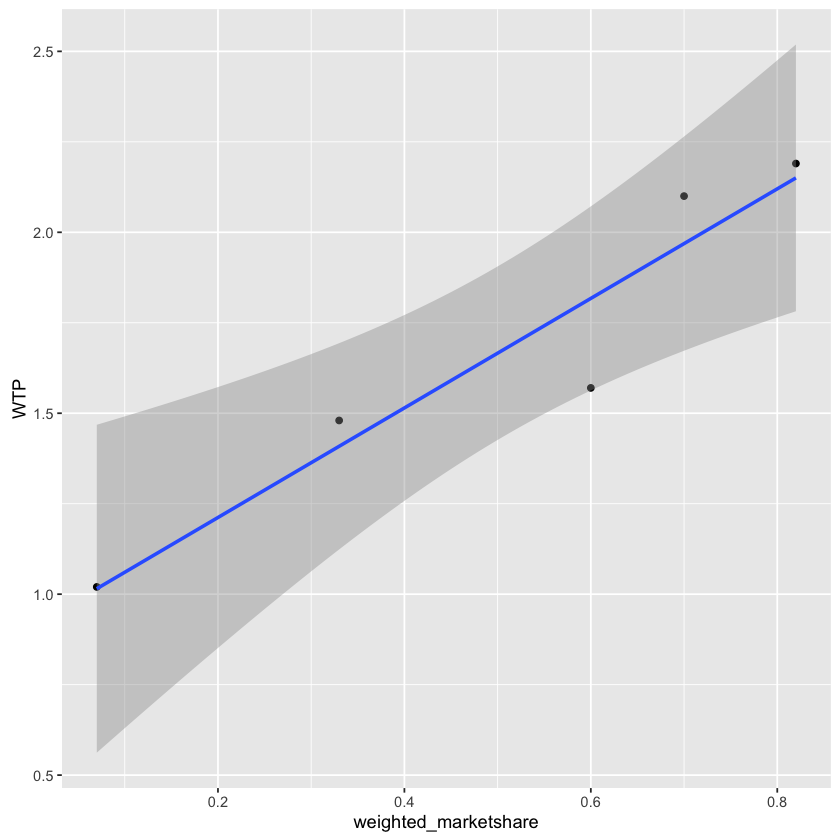

In [101]:
ggplot(Result, aes(x=weighted_marketshare, y=WTP)) + geom_point() + geom_smooth(method=lm)

# End of the lecture